## > Gerando data sensível falsa.

In [1]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
# sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_treino.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo do dado'], size=1000)
# sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo do dado'], size=1000)
# sensitive_data_gen.write_csv_data_sensitive_only(size=30)

### Imports de bibliotecas importantes

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from plot_history_helper import plot_history_accuracy, plot_history_loss
from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing

# clear_session() -> limpa os pesos da antiga analise

## > Lendo CSV e criando dados de teste e treino

### Dados de treinamento

In [3]:
# SEÇÃO TREINAMENTO
# Lendo dados de entrada.
# Dados sensíveis e não sensíveis na mesma database.
X_train = pd.read_csv("./dados_sensiveis_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

y_train = X_train["tipo do dado"]
X_train.drop(["tipo do dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values

# Tamanhos das entradas.
x_size:int = X_train.size
y_size:int = y_train.size

print(X_train, x_size)
# FIM SESSÃO TREINAMENTO

                       Dado A               Dado B                    Dado C  \
0               Lorenzo Costa        Android 2.3.2                    Modelo   
1               Laura Barbosa        Android 2.2.1                Urologista   
2            João Pedro Gomes        Android 5.0.2                Marinheiro   
3    Sr. João Miguel da Cunha     2526429906993847          +55 31 6480 5379   
4               Luna Nogueira     3593828677981038              71 4795-1365   
..                        ...                  ...                       ...   
994           Mariane da Mota  4192456146865986609       +55 (051) 0989-1941   
995             Sophie Mendes  4687549239081222418       +55 (051) 5523-4229   
996       Maria Clara Correia     3509619822904238             0800 329 1303   
997            Gabriela Nunes        Android 5.1.1  Apontador de mão-de-obra   
998                Cauê Rocha        Android 8.1.0                 Maquiador   

     tipo do dado  
0               0  

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_11804\2382561674.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Dados de teste.

In [4]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./dados_sensiveis_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

y_test = X_test["tipo do dado"]
X_test.drop(["tipo do dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values

print(X_test, x_size)
# FIM SESSÃO DE TESTE.

                   Dado A               Dado B  \
0         Vitória Cardoso  4224069227327609557   
1        Henrique Moreira     3570729309397618   
2    Maria Eduarda da Luz        Android 5.0.2   
3         Emanuel Martins        Android 2.2.3   
4              Ryan Ramos          Android 5.0   
..                    ...                  ...   
994       Emanuelly Nunes     2373673353081465   
995       Sr. Bruno Cunha         503848002823   
996          Heitor Silva         630455049860   
997        Matheus Farias      213118634292786   
998       Marcela Cardoso      370338053388597   

                               Dado C  tipo do dado  
0                 +55 (071) 6879 2065             1  
1                 +55 (084) 5386 0382             1  
2                  Coveiro/Sepultador             0  
3    Técnico em segurança do trabalho             0  
4                           Repositor             0  
..                                ...           ...  
994               +55

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_11804\649754757.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo

In [5]:
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() # Mostra os paramestros disponíveis para treinar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


### Treinamento e teste do modelo.

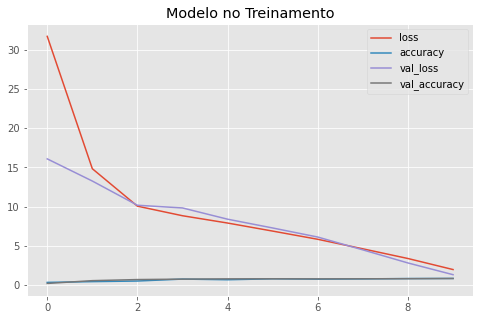

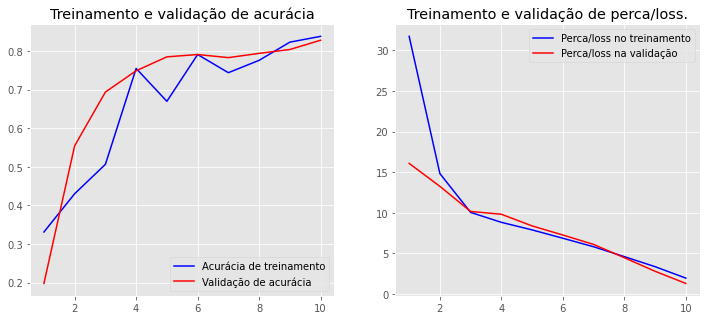

In [6]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

# Treinando o modelo.
#history = model.fit(
#  X_train,
#  y_train,
#  epochs=100,
#  verbose=2,
#)

# Mostrando resultados do treinamento com dataset de train.
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plot.show()


# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=10,
  verbose=False,
  validation_data=(X_test, y_test),
  batch_size=100,
  callbacks =[earlystopping]
)

# Mostrando resultados do treinamento com dataset de train.
pd.DataFrame(history.history).plot(figsize=(8,5))
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Realizando a Avaliação do modelo utilizando os dados de teste.

In [7]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Acurácia no teste: {accuracy}")

32/32 [==============================] - 0s 2ms/step - loss: 1.3155 - accuracy: 0.8278
Acurácia no teste: 0.8278278112411499


</hr>

## > Resultado

### Com um dataset de tamanho pequeno, foi possível encontrar um modelo de previsão de 100% na detecção de dados sensíveis.
### Agora será testado 10 módelos e feito a média entre eles para verificar se o modelo e os métodos utilizados foram feitos de maneira correta.

### Criando 10 modelos e pegando 10 pedaços do dataset para comparar precisão entre os modelos Sequenciais

In [8]:
import matplotlib.pyplot as plot
import numpy as np
import random
from plot_history_helper import plot_history
from keras import callbacks
from sklearn.model_selection import StratifiedKFold


# Seed fix para poder reproduzir o "teste".
seed = random.randint(0, 100)
np.random.seed(seed)

#X = pd.read_csv("./dados_sensiveis.csv")
#X.fillna(X.mean(), inplace=True)

X = pd.read_csv("./dados_sensiveis_teste2.csv")
X.fillna(X.mean(), inplace=True)

columns = list(X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

y = X["tipo do dado"]
X.drop(["tipo do dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values

print(X, x_size)

# Pegando 10 cortes do dataset original de maneira aleatória.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores:list = []
# Criando 10 modelos com 10 datasets cortados pegos do dataset original e depois comparando os resultados.
list_of_models:list = []
for train, test in kfold.split(X, y):
  clear_session()
  #print(test, train)
  # Salvando os melhores pesos.
  earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
  # modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
  input_dim = X.shape[1]
  model = keras.Sequential()
  model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  # Configurando o modelo de treinamento.
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary() # Mostra os paramestros disponíveis para treinar
  #Treinando o modelo.
  history = model.fit(
    X[train],
    y[train],
    epochs=100,
    verbose=0,
  )
  scores = model.evaluate(X[test], y[test], verbose=0)
  #loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  list_of_models.append((model, (scores[1] * 100)))

[[                  0    3584369065686187                   0]
 [                  1        676354164227                   1]
 [                  2     349682343363045                   2]
 [                  3 4284992195388489373                   3]
 [                  4     347154367842330                   4]
 [                  5        569262754348                   5]
 [                  6    3502553552593100                   6]
 [                  7    3549127763220814                   7]
 [                  8     213164135022074                   8]
 [                  9    2700289497399905                   9]
 [                 10    6011228189437149                  10]
 [                 11    4189250077457345                  11]
 [                 12    3561215783720997                  12]
 [                 13     349240121216586                  13]
 [                 14 4466082194367295418                  14]
 [                 15    4670608192642628              

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_11804\3280758713.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


accuracy: 100.00%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
accuracy: 100.00%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 d

### Lista de modelos, resultados deles e média de acurácia.

In [9]:
for model, score in list_of_models:
  print(model, score)
print("Média: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

<keras.engine.sequential.Sequential object at 0x00000269962FAEF0> 100.0
<keras.engine.sequential.Sequential object at 0x00000269BAB632B0> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C4143E20> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C42AEE60> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C4107D60> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C4107A00> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C0D99480> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C4140A90> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C4195A50> 100.0
<keras.engine.sequential.Sequential object at 0x00000269C66C9240> 100.0
Média: 100.00% (+/- 0.00%)


### Selecionando o melhor modelo Sequencial dos 10 criados.

In [10]:
maximum = 0
for k, v in list_of_models:
  #print(k, v)
  if v > maximum:
    maximum = v
    m = k
model = m
best_score = maximum

print("Melhor modelo com a maior avaliação escolhida:")
print(model, best_score)

Melhor modelo com a maior avaliação escolhida:
<keras.engine.sequential.Sequential object at 0x00000269962FAEF0> 100.0


## Olhando o resultado acima, podemos dizer que o modelos criados possuem um desempenho relativamente bom, considerando que a média esperada é de 70% até 90%.

## > Avaliação do ultimo modelo criado no loop modelo.

### Criando o dataset.

In [11]:
# CRIANDO UM DATASET COM DADOS ALEATÓRIOS.
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_mix_com_classes.csv", title=['Dado A', 'Dado B', 'Dado C', 'tipo do dado'], size=1000)
sensitive_data_gen.write_csv_data_sensitive_only(name="dados_sensiveis_com_classes.csv", title=['Dado A', 'Dado B', 'Dado C','tipo do dado'], size=1000)

### Carregando um dataset médiano para avaliar o ultimo modelo criado no loop.

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Leitura da dataset.
X = pd.read_csv("./dados_sensiveis_mix_com_classes.csv")
X.fillna(X.mean(), inplace=True)

columns = list(X)
print("Antes de dropar a Classe Y: \n", X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

scalar = MinMaxScaler()
scalar.fit(X)
#X = scalar.transform(X)

X.drop(["tipo do dado"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
print("Depois de dropar a Classe Y: \n", X)

Antes de dropar a Classe Y: 
                   Dado A            Dado B               Dado C  tipo do dado
0         Gustavo Castro  3525986935146464     +55 84 5720 3374             1
1            Sarah Moura     Android 8.0.0            Paginador             0
2         Paulo Silveira     Android 2.3.4             Agrônomo             0
3    Luiz Henrique Ramos  4574768616142790     +55 11 8213-2853             1
4      Enzo Gabriel Melo   348233718794637  +55 (021) 5772-3140             1
..                   ...               ...                  ...           ...
994         Emilly Rocha  6514725837087848      (081) 0102 9008             1
995     Daniela Caldeira     Android 4.3.1          Historiador             0
996        Benício Pinto   371318747740311      (071) 8384 2832             1
997       Daniela Mendes       Android 2.3       Neurocirurgião             0
998     Sophia Rodrigues       Android 4.3         Ascensorista             0

[999 rows x 4 columns]
Depois de 

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_11804\842231534.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


### Avaliando o modelo com o dataset novo.

### Verificando a previsão com os valores reais

In [19]:
import matplotlib.pyplot as plt

model.summary()
predict_x=model.predict(X) 
classes_x=np.argmax(predict_x, axis=1)
for i in range(999):
	print(f"X={X[i]} Previsão={predict_x[i]}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 2ms/step
X=[0 0 0] Previsão=[0.51434946]
X=[1 1 1] Previsão=[0.53437966]
X=[2 2 2] Previsão=[0.5520357]
X=[3 3 3] Previsão=[0.5703774]
X=[4 4 4] Previsão=[0.5885279]
X=[5 5 5] Previsão=[0.6064408]
X=[6 6 6] Previsão=[0.62407184]
X=[7 7 7] Previsão=[0.64138025]
X=[8 8 8] Previsã

In [20]:
# Vendo versão final do resultado.
#clear_session()

loss, accuracy = model.evaluate(X, predict_x, verbose=2)
print(f"Previsão no teste: {accuracy}")

32/32 - 0s - loss: 0.0452 - accuracy: 0.5295 - 75ms/epoch - 2ms/step
Previsão no teste: 0.5295295119285583


## Salvando o modelo na pasta models

In [17]:
filepath = "./model/2.0"
model.save(filepath)
keras.models.load_model(filepath)

INFO:tensorflow:Assets written to: ./model/1.0\assets
